## Predict Electricity Production using Fuzzy Time Series
### Proyek Akhir Semester Mata Kuliah Praktikum Data Mining

### 1. Data Preprocessing

In [1]:
import warnings
from pyFTS.partitioners import Grid
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [2]:
dataset = pd.read_csv("./dataset/bulanan-ekspor-impor.csv")

In [3]:
dataset

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2019-01-01,1.402809e+10,5.515374e+10,1.500519e+10,13892230800
1,2019-02-01,1.278856e+10,4.871454e+10,1.246507e+10,12538456210
2,2019-03-01,1.444779e+10,5.752631e+10,1.374662e+10,13125266829
3,2019-04-01,1.306807e+10,5.236533e+10,1.539919e+10,14143962559
4,2019-05-01,1.475189e+10,5.768002e+10,1.460666e+10,14766069634
5,2019-06-01,1.176335e+10,4.649760e+10,1.149539e+10,10254928550
6,2019-07-01,1.523842e+10,5.640808e+10,1.551848e+10,13609908017
7,2019-08-01,1.426196e+10,5.238528e+10,1.416935e+10,12679655746
8,2019-09-01,1.408011e+10,5.458817e+10,1.426345e+10,13506445659
9,2019-10-01,1.488146e+10,6.141298e+10,1.475908e+10,13605297569


In [4]:
df = dataset.dropna()

In [5]:
df

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2019-01-01,1.402809e+10,5.515374e+10,1.500519e+10,13892230800
1,2019-02-01,1.278856e+10,4.871454e+10,1.246507e+10,12538456210
2,2019-03-01,1.444779e+10,5.752631e+10,1.374662e+10,13125266829
3,2019-04-01,1.306807e+10,5.236533e+10,1.539919e+10,14143962559
4,2019-05-01,1.475189e+10,5.768002e+10,1.460666e+10,14766069634
5,2019-06-01,1.176335e+10,4.649760e+10,1.149539e+10,10254928550
6,2019-07-01,1.523842e+10,5.640808e+10,1.551848e+10,13609908017
7,2019-08-01,1.426196e+10,5.238528e+10,1.416935e+10,12679655746
8,2019-09-01,1.408011e+10,5.458817e+10,1.426345e+10,13506445659
9,2019-10-01,1.488146e+10,6.141298e+10,1.475908e+10,13605297569


## 3. FTS

In [6]:
df

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2019-01-01,1.402809e+10,5.515374e+10,1.500519e+10,13892230800
1,2019-02-01,1.278856e+10,4.871454e+10,1.246507e+10,12538456210
2,2019-03-01,1.444779e+10,5.752631e+10,1.374662e+10,13125266829
3,2019-04-01,1.306807e+10,5.236533e+10,1.539919e+10,14143962559
4,2019-05-01,1.475189e+10,5.768002e+10,1.460666e+10,14766069634
5,2019-06-01,1.176335e+10,4.649760e+10,1.149539e+10,10254928550
6,2019-07-01,1.523842e+10,5.640808e+10,1.551848e+10,13609908017
7,2019-08-01,1.426196e+10,5.238528e+10,1.416935e+10,12679655746
8,2019-09-01,1.408011e+10,5.458817e+10,1.426345e+10,13506445659
9,2019-10-01,1.488146e+10,6.141298e+10,1.475908e+10,13605297569


In [8]:
# create plot for country_data for every category
import plotly.express as px

bulan_tahun = df['Bulan-Tahun'].values
nilai_ekspor = df['Nilai-Ekspor'].values

fig = px.line(df, x=bulan_tahun, y=nilai_ekspor, title='Nilai Ekspor Bulanan Indonesia')
fig.show()

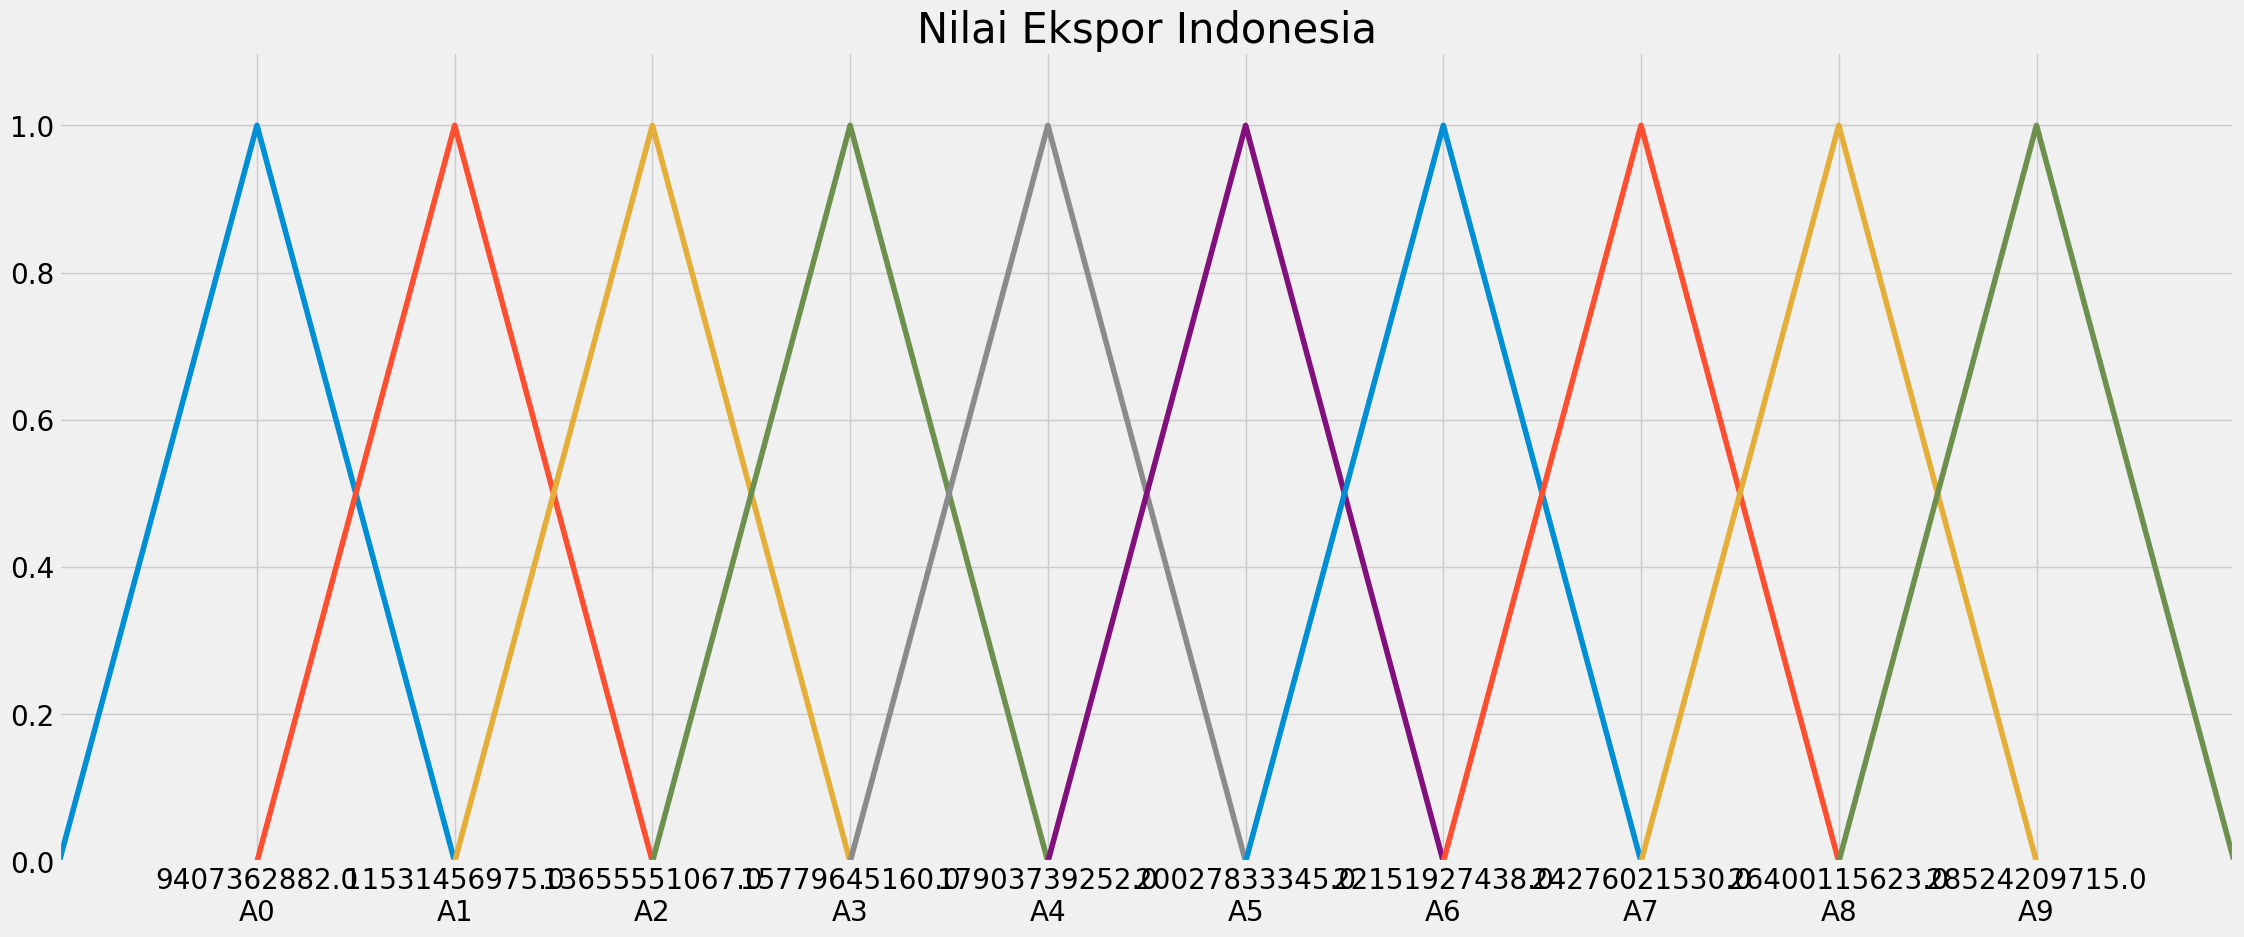

In [9]:
# make fuzzy set
fs = Grid.GridPartitioner(
    data=nilai_ekspor, npart=10)

# make fuzzy set plotly from fs
# fig = go.Figure()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[25, 10])

ax.set_xlim(0, len(nilai_ekspor))
ax.set_ylim(-0.1, 0.1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

fs.plot(ax)
ax.set_title("Nilai Ekspor Indonesia", fontsize=30)

plt.show()

In [10]:
print(fs)

Grid:
A0: trimf([7283268789.771701, 9407362882.311, 11531456974.850302])
A1: trimf([9407362882.311, 11531456974.850302, 13655551067.389603])
A2: trimf([11531456974.850302, 13655551067.389603, 15779645159.928904])
A3: trimf([13655551067.389603, 15779645159.928904, 17903739252.468204])
A4: trimf([15779645159.928904, 17903739252.468204, 20027833345.007504])
A5: trimf([17903739252.46821, 20027833345.007507, 22151927437.546806])
A6: trimf([20027833345.007507, 22151927437.546806, 24276021530.086105])
A7: trimf([22151927437.546806, 24276021530.086105, 26400115622.625404])
A8: trimf([24276021530.08611, 26400115622.62541, 28524209715.164707])
A9: trimf([26400115622.62541, 28524209715.164707, 30648303807.704006])



In [11]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(nilai_ekspor)
print(model)

Conventional FTS:
A0 -> A1
A1 -> A0,A2,A3
A2 -> A1,A2,A3
A3 -> A1,A2,A3,A4
A4 -> A4,A5
A7 -> A5,A6,A7
A5 -> A5,A6,A8
A6 -> A5,A6,A7,A8
A9 -> A7
A8 -> A6,A8,A9



In [12]:
prediction = model.predict(nilai_ekspor)

In [13]:
fts_dates = df['Bulan-Tahun'].values
data_fts_result = pd.DataFrame({
    'date': fts_dates,
    'actual': nilai_ekspor,
    'prediction': prediction
})

In [14]:
# Plot the data using Plotly
import plotly.graph_objects as go
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(
    x=data_fts_result['date'], y=data_fts_result['actual'], mode='lines', name='Actual'))

# Add forecast data
fig.add_trace(go.Scatter(
    x=data_fts_result['date'], y=data_fts_result['prediction'], mode='lines', name='Forecast'))

# Set layout
fig.update_layout(
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=12),
        tickformat='%Y-%m-%d'
    ),
    yaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=20)
    ),
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom',
        font=dict(size=12)
    )
)

# Add vertical lines with alternating styles
for i in range(len(fts_dates)):
    if i % 2 == 0:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='solid'))
    else:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='dash'))

fig.show()

In [15]:
# show model performance
from pyFTS.benchmarks import Measures

print("RMSE : ", Measures.rmse(data_fts_result['actual'], data_fts_result['prediction']))
print("MAPE : ", Measures.mape(data_fts_result['actual'], data_fts_result['prediction']))

RMSE :  1505412531.3719006
MAPE :  6.089586085273399
